<a href="https://colab.research.google.com/github/theQuert/ipyfun/blob/master/IP_110753204_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **ID**: 11075204
- **Name**: 李昱廷
- **Class**: 資碩計一

### 1. Remove salt-and-pepper noise

#### a. (20%) Write a routine that performs two-dimensional 5x5 median filtering to try
to clean up the noise of ‘bab_noise.bmp’ and ‘peppers_noise.’ You need to exclude the noise pixels before applying median filtering and report PSNR before and after denoising as the table below shows.

- `bab_noise.bmp`, `baboon.bmp`
- `peppers_noise.bmp`, `peppers.bmp`

In [52]:
import math
import cv2
import numpy as np
from math import log10 as log
from skimage.filters import median
from PIL import Image
from google.colab.patches import cv2_imshow
from scipy import ndimage, misc, signal
from cv2.ximgproc import guidedFilter

In [21]:
# create PSNR function
def psnr(noise, modified):
    mse = np.mean((noise - modified) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

calculate the PSNR on given photos with noised and denoised ones

In [22]:
noise_baboon = cv2.imread('bab_noise.bmp')
modified_baboon = cv2.imread('baboon.bmp') # the denoised pic
noise_peppers = cv2.imread("peppers_noise.bmp")
modified_peppers = cv2.imread("peppers.bmp", 1) # the denoised pic
# PSNR for `bab_noise.bmp`, `baboon.bmp`
psnr_val = psnr(noise_baboon, modified_baboon)
print(psnr_val)
# PSNR for `peppers_noise.bmp`, `peppers.bmp`
psnr_val = psnr(noise_peppers, modified_peppers)
print(psnr_val)

28.994347973545356
29.67360319886151


try two different median filters from `cv2` and `skimage` packages, and compare with each other with PSNR evaluation

In [23]:
# median filter from skimage
median_skimage_peppers = median(noise_peppers, mode='nearest', cval=0.0)
median_skimage_baboon = median(noise_baboon, mode='nearest', cval=0.0)
# median filter from cv2
median_cv2_peppers = cv2.medianBlur(noise_peppers, 5)
median_cv2_baboon = cv2.medianBlur(noise_baboon, 5)

In [25]:
# for baboon.bmp
psnr_val = psnr(noise_baboon, modified_baboon)
print(f'The PSNR of given pics: {psnr_val}')
psnr_val = psnr(median_skimage_baboon, modified_baboon)
print(f'The PSNR of median filter from skimage package: {psnr_val}')
psnr_val = psnr(median_cv2_baboon, modified_peppers)
print(f'The PSNR of median filter from cv2 package: {psnr_val}')

The PSNR of given pics: 28.994347973545356
The PSNR of median filter from skimage package: 29.14345741200037
The PSNR of median filter from cv2 package: 28.007664544512632


In [24]:
# for peppers.bmp
psnr_val = psnr(noise_peppers, modified_peppers)
print(f'The PSNR of given pics: {psnr_val}')
psnr_val = psnr(median_skimage_peppers, modified_peppers)
print(f'The PSNR of median filter from skimage package: {psnr_val}')
psnr_val = psnr(median_cv2_peppers, modified_peppers)
print(f'The PSNR of median filter from cv2 package: {psnr_val}')

The PSNR of given pics: 29.67360319886151
The PSNR of median filter from skimage package: 30.33720077160683
The PSNR of median filter from cv2 package: 30.397259218799167


From obtained results, we select the best performed PSNR image as our denoising image output → 
- `baboon.bmp`:median filter using `skimage` package (PSNR $\approx$ `29.1435`)
- `peppers.bmp`:median filter using `cv2` package (PSNR $\approx$ `30.3973`)


$→$

|PSNR   |Before denoising|After denoising|
|-------|----------------|---------------|
|Baboon |28.9943         |29.1435        |
|Peppers|29.6736         |30.3973        |  

The output photo with our selected best parameters are showed below:
1. Baboon with median filtering
\
$↓$

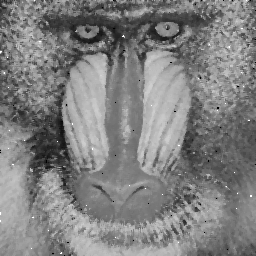

In [63]:
cv2_imshow(median_skimage_baboon)

2. Peppers with median filtering
\
$↓$

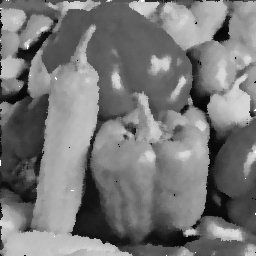

In [64]:
cv2_imshow(median_cv2_peppers)

#### b. (20%) Following the previous question, use two-dimensional 5x5 Gaussian filtering with its kernel as below and report the PSNR results:

The given filter:

| 0.0232 | 0.0338 | 0.0383 | 0.0338 | 0.0232|
| ------ | ------ | ------ | ------ | ----- |
| 0.0338 | 0.0492 | 0.0558 | 0.0492 | 0.0338|
| 0.0383 | 0.0558 | 0.0632 | 0.0558 | 0.0383|
| 0.0338 | 0.0492 | 0.0558 | 0.0492 | 0.0338|
| 0.0232 | 0.0338 | 0.0383 | 0.0338 | 0.0232|

In [26]:
# create filter in numpy array format
filter = np.array([
                   [0.0232, 0.0338, 0.0383, 0.0338, 0.0232],
                   [0.0338, 0.0492, 0.0558, 0.0492, 0.0338],
                   [0.0383, 0.0558, 0.0632, 0.0558, 0.0383],
                   [0.0338, 0.0492, 0.0558, 0.0492, 0.0338],
                   [0.0232, 0.0338, 0.0383, 0.0338, 0.0232]
])

In [27]:
noise_baboon = cv2.imread('bab_noise.bmp')
modified_baboon = cv2.imread('baboon.bmp')
noise_peppers = cv2.imread("peppers_noise.bmp")
modified_peppers = cv2.imread("peppers.bmp", 1)

We convert photo to gray-scale for doing convolution later

In [65]:
# Baboon
# convert to gray-scale
noise_baboon_gray = cv2.cvtColor(noise_baboon, cv2.COLOR_RGB2GRAY)
mod_baboon_gray = cv2.cvtColor(modified_baboon, cv2.COLOR_RGB2GRAY)
# convolution
conv_baboon = signal.convolve2d(noise_baboon_gray, filter, boundary='symm', mode='same')
psnr_val = psnr(noise_baboon_gray, mod_baboon_gray)
print(f'The PSNR of noised pics: {psnr_val}')
psnr_val = psnr(conv_baboon, mod_baboon_gray)
print(f'The PSNR of denoised pics: {psnr_val}')

The PSNR of noised pics: 28.994347973545356
The PSNR of denoised pics: 19.135132418307748


In [66]:
# Peppers
# convert to gray-scale
noise_peppers_gray = cv2.cvtColor(noise_peppers, cv2.COLOR_RGB2GRAY)
mod_peppers_gray = cv2.cvtColor(modified_peppers, cv2.COLOR_RGB2GRAY)
# convolution
conv_peppers = signal.convolve2d(noise_peppers_gray, filter, boundary='symm', mode='same')
psnr_val = psnr(noise_peppers_gray, mod_peppers_gray)
print(f'The PSNR of noised pics: {psnr_val}')
psnr_val = psnr(conv_peppers, mod_peppers_gray)
print(f'The PSNR of denoised pics: {psnr_val}')

The PSNR of noised pics: 29.67360319886151
The PSNR of denoised pics: 18.400000437067348


By using the given Gaussian Filter, the PSNR on both photos are getting lower, the results are listed below:

|PSNR   |Before denoising|Using Gaussian Filter|
|-------|----------------|---------------------|
|Baboon |28.9943         |19.1351              |
|Peppers|29.6736         |18.4000              |

The output photo with our selected best parameters are showed below:
1. Baboon with gaussian filtering
\
$↓$

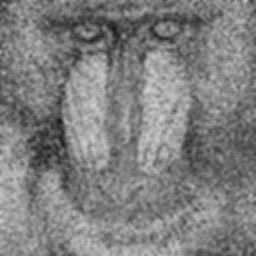

In [67]:
cv2_imshow(conv_baboon)

2. Peppers with gaussian filtering
\
$↓$

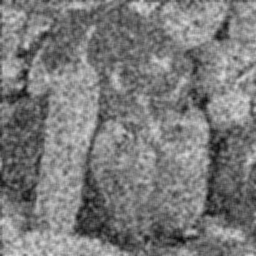

In [68]:
cv2_imshow(conv_peppers)

#### (10%) Write a rotine that performs two-dimensional median filtering with an adaptive kernel size on bab_noise_90.bmp. For each noise pixel “p”, the adaptive kernel size needs to be the same as the smallest size of the sliding window centered at “p” with at least one non-noise pixel. Please also report the PSNR results in the table format like Q1.a.

### 2. Denoising (Gaussian noise)
                                          
Please apply
a. (10%) NLMs
b. (10%) guided filtering
to ‘peppers_0.01.bmp,’ ‘peppers_0.04.bmp,’ and ‘peppers_0.08.bmp,’ and demonstrate their visual results and PSNR. You can use off-the-shelf APIs to produce the results.

#### a. (10%) NLMs 

##### a.1 NLMs on `peppers_0.01.bmp`

In [69]:
peppers_001 = cv2.imread('peppers_0.01.bmp')
peppers_004 = cv2.imread('peppers_0.04.bmp')
peppers_008 = cv2.imread('peppers_0.08.bmp')

At first, we tried three denoising methods by modifying and testing different parameters on `h` and `hForColorComponents`. More information is listed below:

In [70]:
# trying different denoising methods
denoise_1 = cv2.fastNlMeansDenoisingColored(peppers_001,None,3,3,7,21) 
denoise_2 = cv2.fastNlMeansDenoisingColored(peppers_001,None,5,5,7,21) 
denoise_3 = cv2.fastNlMeansDenoisingColored(peppers_001,None,15,15,7,21)

In [73]:
# peppers
# convert to gray-scale
denoise_1_gray = cv2.cvtColor(denoise_1, cv2.COLOR_RGB2GRAY)
denoise_2_gray = cv2.cvtColor(denoise_2, cv2.COLOR_RGB2GRAY)
denoise_3_gray = cv2.cvtColor(denoise_3, cv2.COLOR_RGB2GRAY)
peppers_001_gray = cv2.cvtColor(peppers_001, cv2.COLOR_RGB2GRAY)
# convolution
psnr_val = psnr(peppers_001_gray, mod_peppers_gray)
print(f'The PSNR of peppers_001 pics: {psnr_val}')
psnr_val = psnr(denoise_1_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics on the first filter: {psnr_val}')
psnr_val = psnr(denoise_2_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics on the second filter: {psnr_val}')
psnr_val = psnr(denoise_3_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics on the third filter: {psnr_val}')

The PSNR of peppers_001 pics: 28.39132896432222
The PSNR of denoised pics on the first filter: 28.39429797619146
The PSNR of denoised pics on the second filter: 28.394473308491946
The PSNR of denoised pics on the third filter: 30.319762158160742


From the obtained PSNR after try three settings on photo, we get the highest PSNR value on the third filter. Thus, we select the third settings as our output.

We've try three parameters setting on `peppers_0.01.bmp`, using fixed `WindowSize`, but try different `h`, and `hForColorComponents`.
We found that using higher `h` and `hForColorComponents` will make image more smooth. Thus, we choose (15,15) as our best settings. 
The images before filtering, after filtering, and PSNR are show as below:

Before filtering:

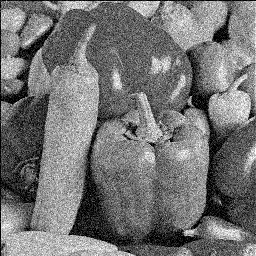

In [71]:
cv2_imshow(peppers_001)

the visual result of NLMs on `peppers_0.01.bmp`
\
↓

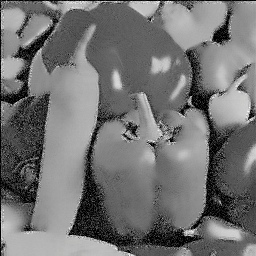

In [33]:
cv2_imshow(denoise_3)

By using the NLMs, the PSNR results before and after filtering are listed below:
$→$

|PSNR         |Before denoising|Using NLMs|
|-------------|----------------|----------|
|peppers_0.01 |28.3913         |30.3198   |

##### a.2 NLMs on `peppers_0.04.bmp`

In [35]:
# trying different denoising methods
denoise_1 = cv2.fastNlMeansDenoisingColored(peppers_004,None,3,3,7,21) 
denoise_2 = cv2.fastNlMeansDenoisingColored(peppers_004,None,5,5,7,21) 
denoise_3 = cv2.fastNlMeansDenoisingColored(peppers_004,None,15,15,7,21)
modified_peppers = cv2.imread("peppers.bmp", 1)
mod_peppers_gray = cv2.cvtColor(modified_peppers, cv2.COLOR_RGB2GRAY)

In [36]:
# peppers
# convert to gray-scale
denoise_1_gray = cv2.cvtColor(denoise_1, cv2.COLOR_RGB2GRAY)
peppers_004_gray = cv2.cvtColor(peppers_004, cv2.COLOR_RGB2GRAY)
# convolution
psnr_val = psnr(peppers_004_gray, mod_peppers_gray)
print(f'The PSNR of peppers_004 pics: {psnr_val}')
psnr_val = psnr(denoise_1_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics: {psnr_val}')

The PSNR of peppers_004 pics: 27.932467483885446
The PSNR of denoised pics: 27.92641296072778


In [37]:
# peppers
# convert to gray-scale
denoise_2_gray = cv2.cvtColor(denoise_2, cv2.COLOR_RGB2GRAY)
peppers_004_gray = cv2.cvtColor(peppers_004, cv2.COLOR_RGB2GRAY)
# convolution
psnr_val = psnr(peppers_004_gray, mod_peppers_gray)
print(f'The PSNR of peppers_004 pics: {psnr_val}')
psnr_val = psnr(denoise_2_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics: {psnr_val}')

The PSNR of peppers_004 pics: 27.932467483885446
The PSNR of denoised pics: 27.92641296072778


In [38]:
# peppers
# convert to gray-scale
denoise_3_gray = cv2.cvtColor(denoise_3, cv2.COLOR_RGB2GRAY)
peppers_004_gray = cv2.cvtColor(peppers_004, cv2.COLOR_RGB2GRAY)
# convolution
psnr_val = psnr(peppers_004_gray, mod_peppers_gray)
print(f'The PSNR of peppers_004 pics: {psnr_val}')
psnr_val = psnr(denoise_3_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics: {psnr_val}')

The PSNR of peppers_004 pics: 27.932467483885446
The PSNR of denoised pics: 28.032141719172014


We examine three filtering methods, and check their PSNR. We found that PSNR is highest in the third experiment (`PSNR`$\approx$ `28.0321`).
The visual and PSNR results are showed below: 

|PSNR         |Before denoising|Using NLMs|
|-------------|----------------|----------|
|peppers_0.04 |27.9325         |28.0321   |

Before filtering

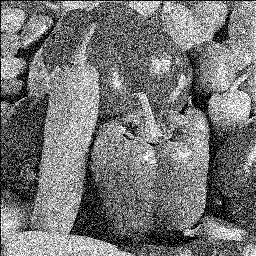

In [74]:
cv2_imshow(peppers_004_gray)

After filtering

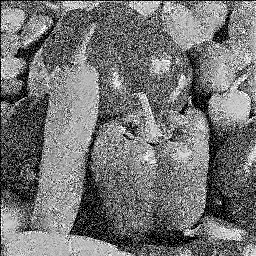

In [39]:
cv2_imshow(denoise_3_gray)

##### a.3 NLMs on `peppers_0.08.bmp`

In [40]:
# trying different denoising methods
denoise_1 = cv2.fastNlMeansDenoisingColored(peppers_008,None,3,3,7,21) 
denoise_2 = cv2.fastNlMeansDenoisingColored(peppers_008,None,5,5,7,21) 
denoise_3 = cv2.fastNlMeansDenoisingColored(peppers_008,None,15,15,7,21)

In [41]:
# peppers
# convert to gray-scale
denoise_1_gray = cv2.cvtColor(denoise_1, cv2.COLOR_RGB2GRAY)
peppers_008_gray = cv2.cvtColor(peppers_008, cv2.COLOR_RGB2GRAY)
# convolution
psnr_val = psnr(peppers_008_gray, mod_peppers_gray)
print(f'The PSNR of peppers_008 pics: {psnr_val}')
psnr_val = psnr(denoise_1_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics: {psnr_val}')

The PSNR of peppers_008 pics: 27.879999280868084
The PSNR of denoised pics: 27.86872561494658


In [42]:
# peppers
# convert to gray-scale
denoise_2_gray = cv2.cvtColor(denoise_2, cv2.COLOR_RGB2GRAY)
peppers_008_gray = cv2.cvtColor(peppers_008, cv2.COLOR_RGB2GRAY)
# convolution
psnr_val = psnr(peppers_008_gray, mod_peppers_gray)
print(f'The PSNR of peppers_008 pics: {psnr_val}')
psnr_val = psnr(denoise_2_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics: {psnr_val}')

The PSNR of peppers_008 pics: 27.879999280868084
The PSNR of denoised pics: 27.86872561494658


In [43]:
# peppers
# convert to gray-scale
denoise_3_gray = cv2.cvtColor(denoise_3, cv2.COLOR_RGB2GRAY)
peppers_008_gray = cv2.cvtColor(peppers_008, cv2.COLOR_RGB2GRAY)
# convolution
psnr_val = psnr(peppers_008_gray, mod_peppers_gray)
print(f'The PSNR of peppers_008 pics: {psnr_val}')
psnr_val = psnr(denoise_3_gray, mod_peppers_gray)
print(f'The PSNR of denoised pics: {psnr_val}')

The PSNR of peppers_008 pics: 27.879999280868084
The PSNR of denoised pics: 27.867738759103815


We examine three filtering methods, and check their PSNR. We found that PSNR is highest in the third experiment (`PSNR`$\approx$ `27.8677`).
The visual and PSNR results are showed below: 

|PSNR         |Before denoising|Using NLMs|
|-------------|----------------|----------|
|peppers_0.08 |27.8800         |27.8677   |

Before filtering

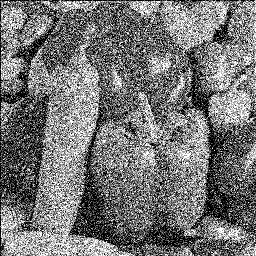

In [75]:
cv2_imshow(peppers_008_gray)

After filtering

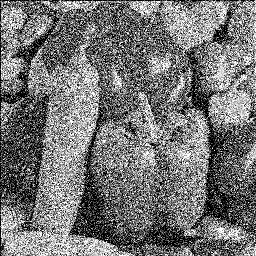

In [44]:
cv2_imshow(denoise_3_gray)

#### b. (10%) guided filtering

We first using `cv2` to normalize the gray-scale photo converted before, than use the clean photo to guide the generated photo.

In [58]:
eps = 3e-6
source_image = cv2.normalize(peppers_001_gray, None, norm_type=cv2.NORM_MINMAX)
mask_face_erode = cv2.erode(mod_peppers_gray, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15)), iterations=1)
better_mask = guidedFilter(source_image.astype(np.float32), mask_face_erode.astype(np.float32), 15, eps)
psnr_val = psnr(peppers_001_gray, mod_peppers_gray)
print(f'The PSNR of noised pics: {psnr_val}')
psnr_val = psnr(better_mask, mod_peppers_gray)
print(f'The PSNR of filtered pics: {psnr_val}')

The PSNR of noised pics: 28.39132896432222
The PSNR of filtered pics: 11.928536440987001


show the guided filtering on `peppers_0.01.bmp`

|PSNR         |Before denoising|Using Guided Filtering|
|-------------|----------------|----------------------|
|peppers_0.01 |28.3913         |11.9285               |

Output photo is showed below
\
$\downarrow$

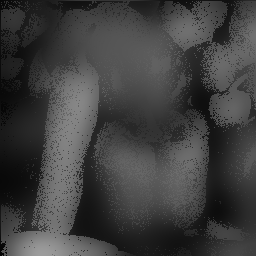

In [51]:
cv2_imshow(better_mask)

In [59]:
eps = 3e-6
source_image = cv2.normalize(peppers_004_gray, None, norm_type=cv2.NORM_MINMAX)
mask_face_erode = cv2.erode(mod_peppers_gray, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15)), iterations=1)
better_mask = guidedFilter(source_image.astype(np.float32), mask_face_erode.astype(np.float32), 15, eps)
psnr_val = psnr(peppers_004_gray, mod_peppers_gray)
print(f'The PSNR of noised pics: {psnr_val}')
psnr_val = psnr(better_mask, mod_peppers_gray)
print(f'The PSNR of filtered pics: {psnr_val}')

The PSNR of noised pics: 27.932467483885446
The PSNR of filtered pics: 11.791710980554528


show the guided filtering on `peppers_0.04.bmp`

|PSNR         |Before denoising|Using Guided Filtering|
|-------------|----------------|----------------------|
|peppers_0.04 |27.9325         |11.7917               |

Output photo is showed below
\
$\downarrow$

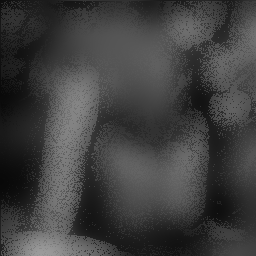

In [54]:
cv2_imshow(better_mask)

In [60]:
eps = 3e-6
source_image = cv2.normalize(peppers_008_gray, None, norm_type=cv2.NORM_MINMAX)
mask_face_erode = cv2.erode(mod_peppers_gray, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15)), iterations=1)
better_mask = guidedFilter(source_image.astype(np.float32), mask_face_erode.astype(np.float32), 15, eps)
psnr_val = psnr(peppers_008_gray, mod_peppers_gray)
print(f'The PSNR of noised pics: {psnr_val}')
psnr_val = psnr(better_mask, mod_peppers_gray)
print(f'The PSNR of filtered pics: {psnr_val}')

The PSNR of noised pics: 27.879999280868084
The PSNR of filtered pics: 11.723618914160696


show the guided filtering on `peppers_0.08.bmp`

|PSNR         |Before denoising|Using Guided Filtering|
|-------------|----------------|----------------------|
|peppers_0.08 |27.8800         |11.7236               |

Output photo is showed below
\
$\downarrow$

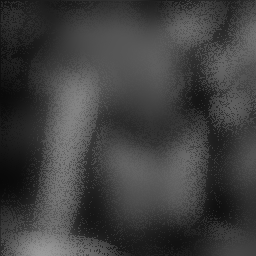

In [61]:
cv2_imshow(better_mask)

### 3. Edge Detection
a. (15%) Please implement Sobel filtering to find the edge map for ‘pepper.bmp’
and ‘pepper_0.01.bmp’, whose results should look like https://www.mathworks.com/discovery/edge-detection.html (please implement the Sobel filter by yourself)
b. (15%) Following the previous question, please use 5x5 Marr-Hildreth operator (shown below) to find their edge maps.